# EDA FARS (Fatality Analysis Reporting System)

### What is this Dataset about?

<p>Data is for automobiles where the right passenger seat was occupied, with one observation for each such passenger. Observations for vehicles where the most harmful event was a fire or explosion or immersion or gas inhalation, or where someone fell or jumped from the vehicle, are omitted. Data is limited to vehicle body types 1 to 19,48,49,61, or 62. This excludes large trucks, pickup trucks, vans and buses. The 2009 and 2010 data does not include information on whether airbags were installed.
</p>

In [56]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [57]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent):
    total_rows = df.shape[0]
    plt.figure(figsize=(16,5))
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_percent = (height*100)/totalrows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent) + ' / ' + '{:1.1f} %'.format(total_percent), ha='center')

## File Structure

In [58]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

totalrows = len(data.index)

Data shape:
151158 Rows x 17 Columns


## Let's see how impact position effects the death

### inimpact: location code of initial impact


total impact points:  24


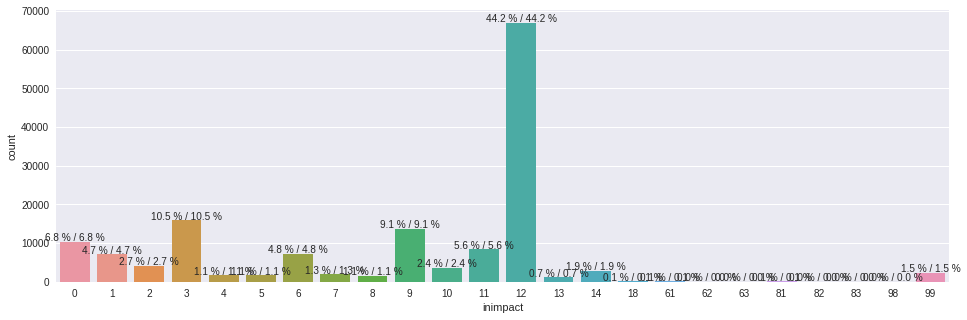

In [59]:
print 'total impact points: ', len(data.inimpact.value_counts().keys())
count_plot('inimpact', 'x', data, 'show')

<img src="img/inimpact.png" />

So 44% of the deaths are caused by the inimpact 12 (front)

20% by 3 and 9

### Lets dig down more to see why 44% o deaths were casued by inimpact 12

In [60]:
filter_ = (data.inimpact == 12)
data_specific_inimpact = data[filter_]

### Lets see if effect of  airbags

#### Were the deployed?

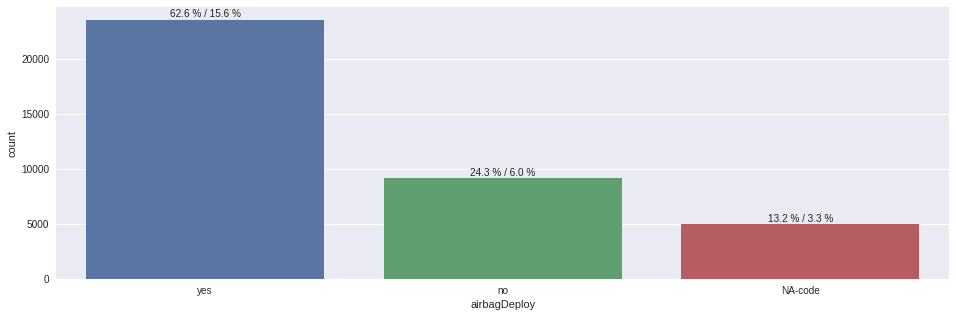

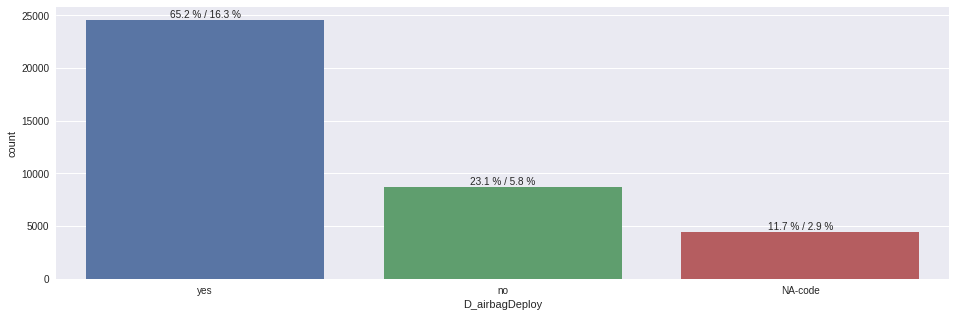

In [61]:
filter_ = (data_specific_inimpact.D_airbagAvail == 'yes') & (data_specific_inimpact.airbagAvail == 'yes')
data_impact_aibagAvail = data_specific_inimpact[filter_]

count_plot('airbagDeploy', 'x', data_impact_aibagAvail, 'show') # passenger's injury 
count_plot('D_airbagDeploy', 'x', data_impact_aibagAvail, 'show') # driver's injury

So airbag weren't deployed in around 24% of the cases when impact was 12.
Passenger's one malfunctioned more

#### Lets see the type of airbag that deployed in case of impact 12

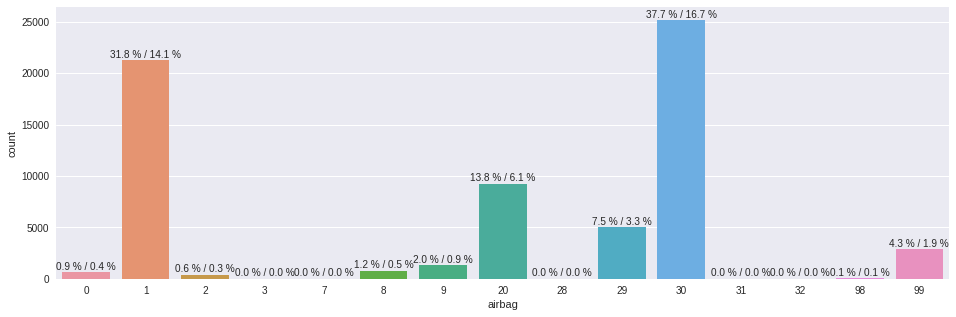

In [62]:
count_plot('airbag', 'x', data_specific_inimpact, 'show')

So seems like 30 (no airbags) and 1 (deployed-front) were the airbags that were deployed for inimpact 12

#### Lets see some stats about airbag 1 (front deployed for both or not)

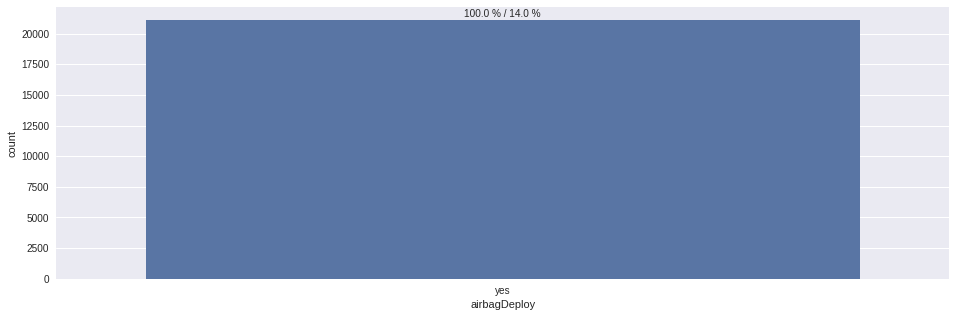

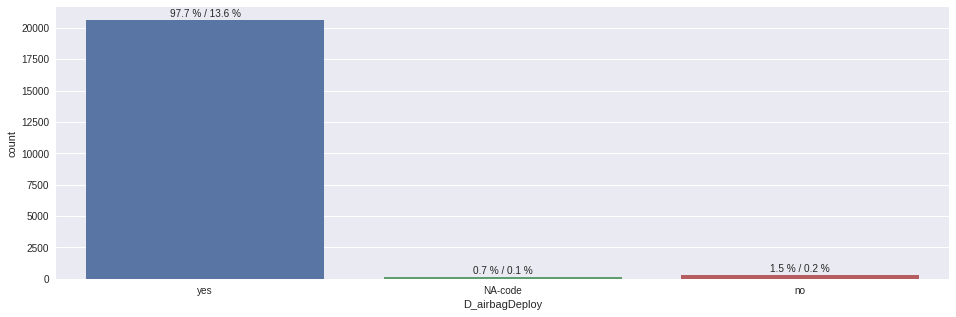

In [63]:
filter_ = (data_specific_inimpact.airbag == 1) & (data_specific_inimpact.airbagAvail == 'yes') & (data_specific_inimpact.D_airbagAvail == 'yes')
data_inimpact_airbag1 = data_specific_inimpact[filter_]
count_plot('airbagDeploy', 'x', data_inimpact_airbag1, 'show')
count_plot('D_airbagDeploy', 'x', data_inimpact_airbag1, 'show')

Paseenger's airbag always worked but driver's aibag malfuntioned 1.5% of the cases

### Lets if seatbelt helped in case of absence of air for inimpact 12

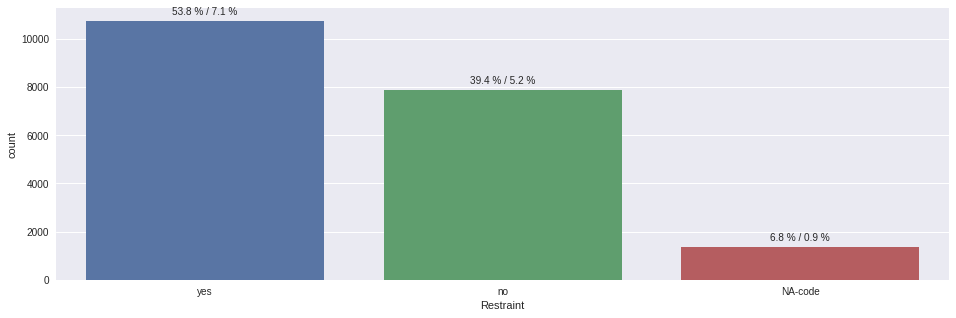

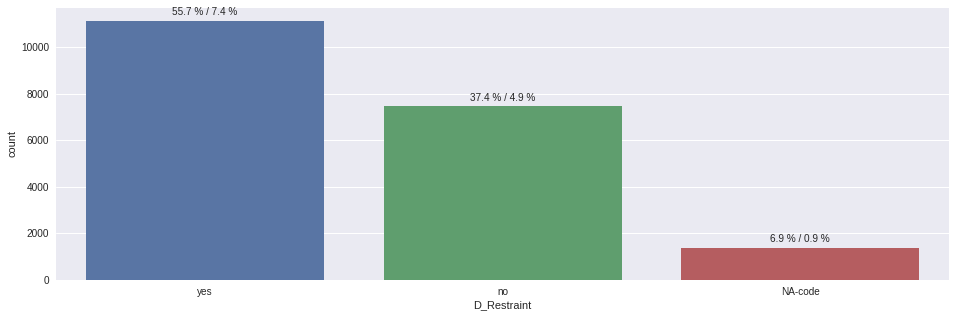

In [64]:
filter_ = (data_specific_inimpact.airbagAvail == 'no') & (data_specific_inimpact.D_airbagAvail == 'no')
count_plot('Restraint', 'x', data_specific_inimpact[filter_], 'show')
count_plot('D_Restraint', 'x', data_specific_inimpact[filter_], 'show')

# WHOLE DATA

### Lets see if seatbelt helped in case of airbag's absence

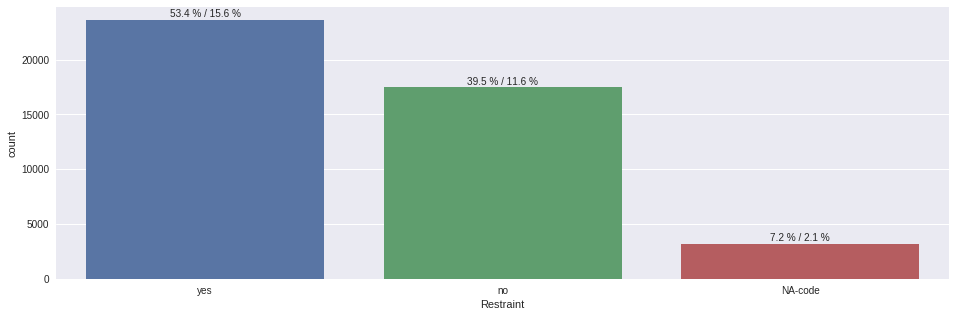

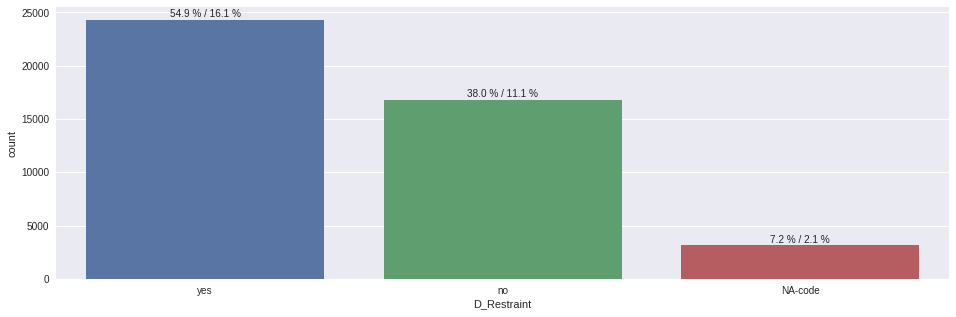

In [65]:
filter_ = (data.airbagAvail == 'no') & (data.D_airbagAvail == 'no')
count_plot('Restraint', 'x', data[filter_], 'show')
count_plot('D_Restraint', 'x', data[filter_], 'show')

### where only passengers airbag malfucntioned

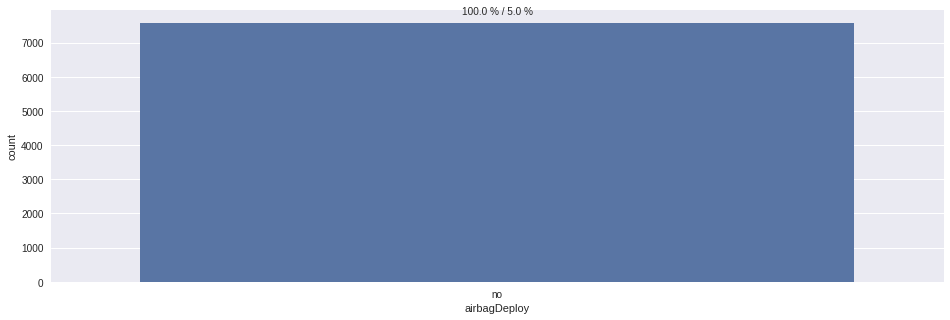

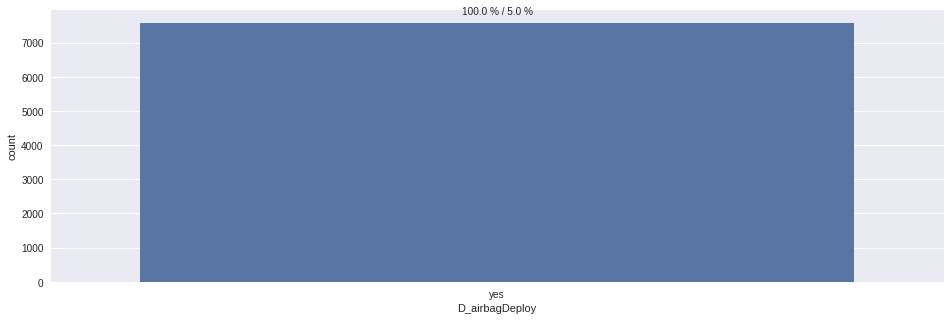

In [66]:
filter_ = (data.D_airbagDeploy == 'yes') & (data.airbagDeploy == 'no')
count_plot('airbagDeploy', 'x', data[filter_], 'show') # driver's injury
count_plot('D_airbagDeploy', 'x', data[filter_], 'show') # driver's injury

5% cases where driver's airbag worked but no passenger's

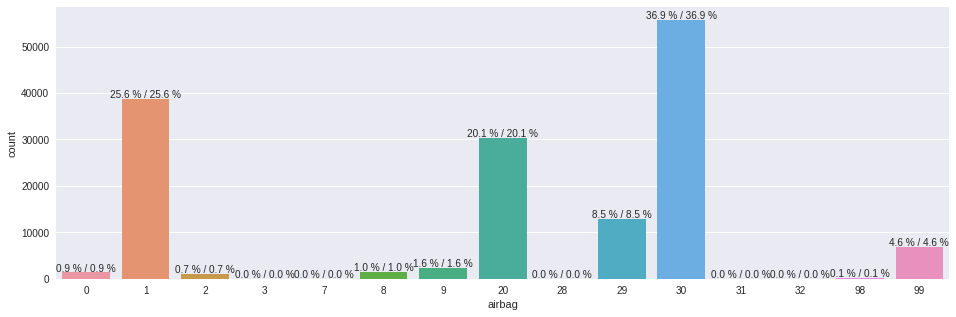

In [67]:
count_plot('airbag', 'x', data, 'show') # driver's injury

20% of the deaths when passenger's airbag malfunctioned. 